## Load Essential Packages

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     cross_val_score, cross_validate)

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, matthews_corrcoef, confusion_matrix)

# Set the aesthetic style for seaborn plots
sns.set(style='whitegrid')

In [19]:
# Model evaluation helper function

def evaluate_model(model, x, y, model_name):
    y_pred = model.predict(x)
    
    f1 = f1_score(y, y_pred, average="macro")
    precision = precision_score(y, y_pred, average="macro")
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average="macro")
    matthews = matthews_corrcoef(y, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Matthews Correlation Coefficient: {matthews:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square=True, cmap="Reds")
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.title(f"{model_name} - Confusion Matrix", size=14)
    plt.show()

    return f1, precision, accuracy, recall, matthews

## Load Dataset

In [20]:
# Assuming the dataset is in the same directory

data = pd.read_csv("qsar_androgen_receptor.csv",sep=";", header=None)
print(data.shape)
data.head(10)

(1687, 1025)


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,positive
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,positive
5,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,positive
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
7,0,0,0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,positive
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


#### The dataset has 1687 observations where the features are molecular fingerprints (0 to 1023) and the last column is the target

## Split the dataset into features (X) and target (y)

In [21]:
x = data.iloc[:, 0:1024]
y = data.iloc[:, -1]

### Encode the Target

In [22]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

### Checking the Data Dimensions

In [23]:
print("Data Dimensions: ", data.shape)
print("Features Dimensions: ", x.shape)
print("Target Dimensions: ", y.shape)

Data Dimensions:  (1687, 1025)
Features Dimensions:  (1687, 1024)
Target Dimensions:  (1687,)


#### Check the distribution of the target class (unbalanced data)

In [24]:
activity_counts = pd.DataFrame(data[1024].value_counts().reset_index())
activity_counts.columns = ['Activity', 'Frequency']
activity_counts['Activity'] = activity_counts['Activity'].replace({0: 'Inactive', 1: 'Active'})
print(activity_counts)

   Activity  Frequency
0  negative       1488
1  positive        199


#### It is possible to see that the data set is not balanced. There are 1488 negative observation and only 199 positive
##### From now on, we deal with the data without correcting the unbalance characteristic
#### Two models were tested for this purpose, named Support Vector Classifier (SVC) and Random Forest (RF)

## 1A Models - Unbalanced

### Splitting the Data into Training and Test Set

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## 1A) Support Vector Classifier

In [26]:
#svc.get_params()
grid_svc = {"C": [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'degree': [2,3,4] ,
            "kernel": ["linear", "poly", "rbf", "sigmoid"]}

svc_cv = GridSearchCV(SVC(random_state=0), grid_svc, verbose=True, cv=3)
svc_cv.fit(x_train, y_train)

print("Best hyperparameters: {}".format(svc_cv.best_params_))

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best hyperparameters: {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}



Support Vector Classifier - Training Results:
F1 Score: 1.00
Precision: 1.00
Accuracy: 1.00
Recall: 1.00
Matthws Correlation Coefficient: 1.00


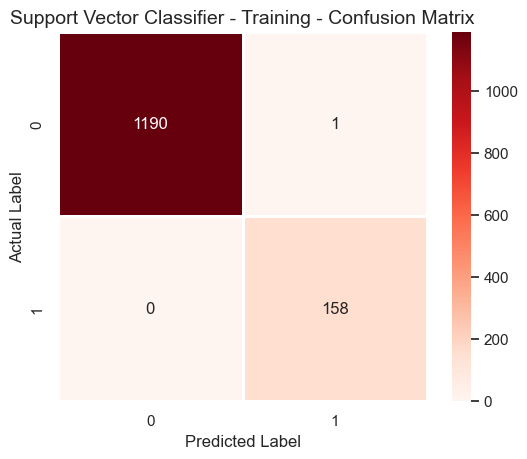


Support Vector Classifier - Test Results:
F1 Score: 0.70
Precision: 0.81
Accuracy: 0.90
Recall: 0.66
Matthws Correlation Coefficient: 0.44


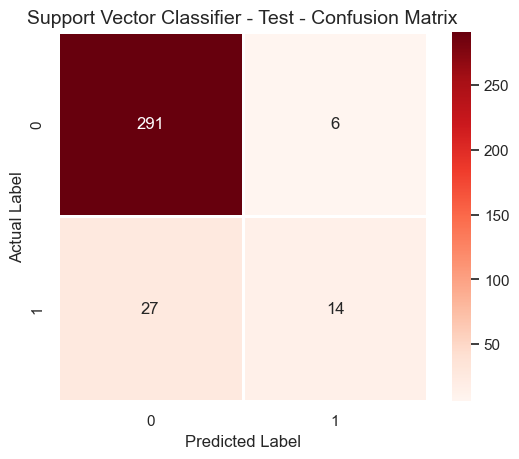

In [27]:
f1_svc_train, precision_svc_train, accuracy_svc_train, recall_svc_train, matthews_svc_train = evaluate_model(svc_cv, x_train, y_train, "Support Vector Classifier - Training")
f1_svc_test, precision_svc_test, accuracy_svc_test, recall_svc_test, matthews_svc_test = evaluate_model(svc_cv, x_test, y_test, "Support Vector Classifier - Test")

## 2A) Random Forest Classifier

In [28]:
grid_RF = {"n_estimators": np.arange(1, 120), 'max_features': [1, 20],
           "max_depth": [1, 50, None], 'bootstrap': [True, False]}

RF_cv = GridSearchCV(RandomForestClassifier(random_state=0), grid_RF, cv=3, verbose=1, scoring='neg_mean_squared_error')
RF_cv.fit(x_train, y_train)

print("Best hyperparameters: {}".format(RF_cv.best_params_))

Fitting 3 folds for each of 1428 candidates, totalling 4284 fits
Best hyperparameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 20, 'n_estimators': 24}



Random Forest Classifier - Training Results:
F1 Score: 1.00
Precision: 1.00
Accuracy: 1.00
Recall: 1.00
Matthws Correlation Coefficient: 1.00


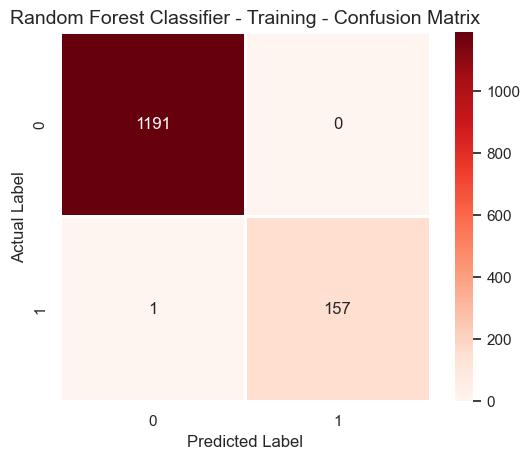


Random Forest Classifier - Test Results:
F1 Score: 0.67
Precision: 0.82
Accuracy: 0.90
Recall: 0.63
Matthws Correlation Coefficient: 0.40


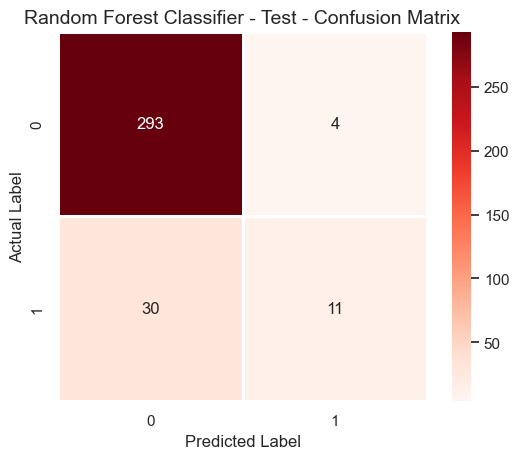

In [29]:
f1_rf_train, precision_rf_train, accuracy_rf_train, recall_rf_train, matthews_rf_train = evaluate_model(RF_cv, x_train, y_train, "Random Forest Classifier - Training")
f1_rf_test, precision_rf_test, accuracy_rf_test, recall_rf_test, matthews_rf_test = evaluate_model(RF_cv, x_test, y_test, "Random Forest Classifier - Test")

## Dealing with Unbalanced Classes Using SMOTE

In [30]:
sm = SMOTE(random_state=0)
x_balanced, y_balanced = sm.fit_resample(x,y)

In [31]:
x_balanced.shape

(2976, 1024)

In [32]:
y_balanced.shape

(2976,)

In [33]:
x_train_balanced, x_test_balanced, y_train_balanced, y_test_balanced = train_test_split(x_balanced, y_balanced, test_size=0.20, random_state=0)

## 1B Models - balanced

## 1B) Support Vector Classifier

In [34]:
#svc.get_params()
grid_svc_B = {"C": [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'degree': [2,3,4] ,
            "kernel": ["linear", "poly", "rbf", "sigmoid"]}

svc_B_cv = GridSearchCV(SVC(random_state=0), grid_svc_B, verbose=True, cv=3)
svc_B_cv.fit(x_train_balanced, y_train_balanced)

print("Best hyperparameters: {}".format(svc_B_cv.best_params_))

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best hyperparameters: {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}



Support Vector Classifier - Training Results:
F1 Score: 1.00
Precision: 1.00
Accuracy: 1.00
Recall: 1.00
Matthws Correlation Coefficient: 1.00


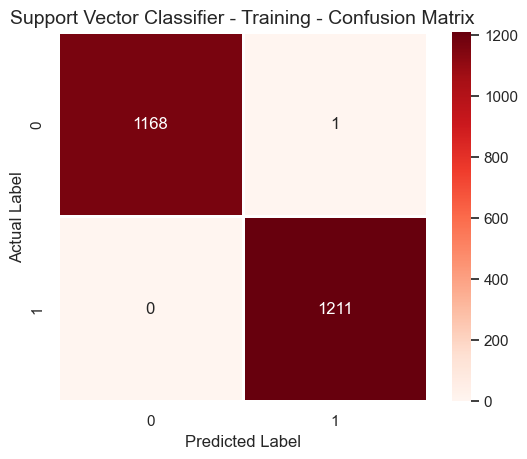


Support Vector Classifier - Test Results:
F1 Score: 0.94
Precision: 0.94
Accuracy: 0.94
Recall: 0.93
Matthws Correlation Coefficient: 0.87


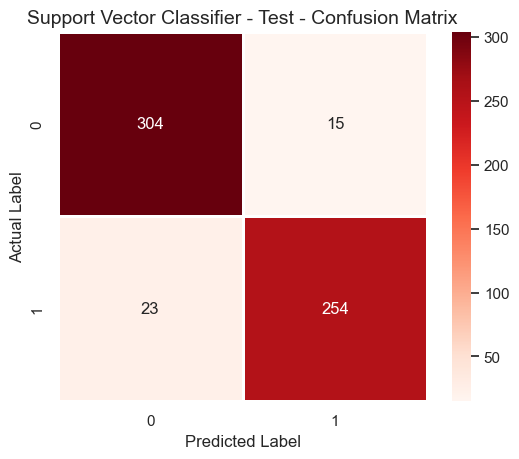

In [35]:
f1_svcB_train, precision_svcB_train, accuracy_svcB_train, recall_svcB_train, matthews_svcB_train = evaluate_model(svc_B_cv, x_train_balanced, y_train_balanced, "Support Vector Classifier - Training")
f1_svcB_test, precision_svcB_test, accuracy_svcB_test, recall_svcB_test, matthews_svcB_test = evaluate_model(svc_B_cv, x_test_balanced, y_test_balanced, "Support Vector Classifier - Test")

## 2B) Random Forest Classifier

In [36]:
grid_RF_B = {"n_estimators": np.arange(1, 120), 'max_features': [1, 20],
           "max_depth": [1, 50, None], 'bootstrap': [True, False]}

RF_cv_B = GridSearchCV(RandomForestClassifier(random_state=0), grid_RF_B, cv=3, verbose=1, scoring='neg_mean_squared_error')
RF_cv_B.fit(x_train_balanced, y_train_balanced)

print("Best hyperparameters: {}".format(RF_cv.best_params_))

Fitting 3 folds for each of 1428 candidates, totalling 4284 fits
Best hyperparameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 20, 'n_estimators': 24}



Random Forest Classifier - Training Results:
F1 Score: 1.00
Precision: 1.00
Accuracy: 1.00
Recall: 1.00
Matthws Correlation Coefficient: 1.00


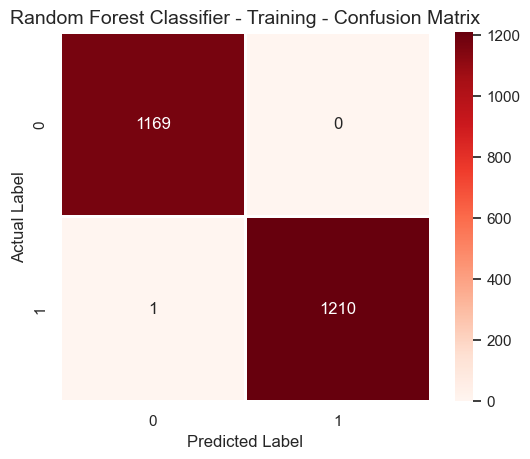


Random Forest Classifier - Test Results:
F1 Score: 0.95
Precision: 0.95
Accuracy: 0.95
Recall: 0.95
Matthws Correlation Coefficient: 0.90


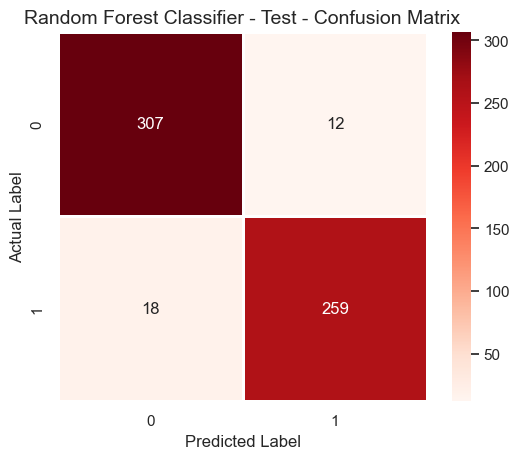

In [38]:
f1_rfB_train, precision_rfB_train, accuracy_rfB_train, recall_rfB_train, matthews_rfB_train = evaluate_model(RF_cv_B, x_train_balanced, y_train_balanced, "Random Forest Classifier - Training")
f1_rfB_test, precision_rfB_test, accuracy_rfB_test, recall_rfB_test, matthews_rfB_test = evaluate_model(RF_cv_B, x_test_balanced, y_test_balanced, "Random Forest Classifier - Test")

In [39]:
# Summary for training
models_training = ["SVC Unbalanced", "Random Forest Unbalanced", "SVC Balanced", "Random Forest Balanced"]
f1_train = [f1_svc_train, f1_rf_train, f1_svcB_train, f1_rfB_train]
precision_train = [precision_svc_train, precision_rf_train, precision_svcB_train, precision_rfB_train]
accuracy_train = [accuracy_svc_train, accuracy_rf_train, accuracy_svcB_train, accuracy_rfB_train]
recall_train = [recall_svc_train, recall_rf_train, recall_svcB_train, recall_rfB_train]
matthews_train = [matthews_svc_train, matthews_rf_train, matthews_svcB_train, matthews_rfB_train]

results_df_training = pd.DataFrame({
    "Algorithm": models_training,
    "F1 Score": f1_train,
    "Precision": precision_train,
    "Accuracy": accuracy_train,
    "Recall": recall_train,
    "Matthews": matthews_train
})

results_df_training


# Summary for test
models_test = ["SVC Unbalanced", "Random Forest Unbalanced", "SVC Balanced", "Random Forest Balanced"]
f1_test = [f1_svc_test, f1_rf_test, f1_svcB_test, f1_rfB_test]
precision_test = [precision_svc_test, precision_rf_test, precision_svcB_test, precision_rfB_test]
accuracy_test = [accuracy_svc_test, accuracy_rf_test, accuracy_svcB_test, accuracy_rfB_test]
recall_test = [recall_svc_test, recall_rf_test, recall_svcB_test, recall_rfB_test]
matthews_test = [matthews_svc_test, matthews_rf_test, matthews_svcB_test, matthews_rfB_test]

results_df_test = pd.DataFrame({
    "Algorithm": models_test,
    "F1 Score": f1_test,
    "Precision": precision_test,
    "Accuracy": accuracy_test,
    "Recall": recall_test,
    "Matthews": matthews_test
})

results_df_test


print("Results for Training Set")
print("-"*70)
print(results_df_training)
print("-"*70)
print("Results for Test Set")
print("-"*70)
print(results_df_test)
print("-"*70)

Results for Training Set
----------------------------------------------------------------------
                  Algorithm  F1 Score  Precision  Accuracy    Recall  Matthews
0            SVC Unbalanced  0.998213   0.996855  0.999259  0.999580  0.996432
1  Random Forest Unbalanced  0.998203   0.999581  0.999259  0.996835  0.996412
2              SVC Balanced  0.999580   0.999587  0.999580  0.999572  0.999160
3    Random Forest Balanced  0.999580   0.999573  0.999580  0.999587  0.999160
----------------------------------------------------------------------
Results for Test Set
----------------------------------------------------------------------
                  Algorithm  F1 Score  Precision  Accuracy    Recall  Matthews
0            SVC Unbalanced  0.702679   0.807547  0.902367  0.660631  0.444529
1  Random Forest Unbalanced  0.669009   0.820227  0.899408  0.627412  0.403985
2              SVC Balanced  0.935790   0.936951  0.936242  0.934973  0.871921
3    Random Forest Balanced  0

 ##### Prior to balancing the data, the training set exhibited exceptionally high metrics (>0.99), while the test set showed considerably lower values.

##### This discrepancy suggests the presence of overfitting.

##### After balancing the dataset, both the training and test sets demonstrated improved and more consistent metrics.